# Visualization

Here I'll do some data viz to get a better understanding of my stuff

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 16

In [46]:
df = pd.read_csv('../data/nice_data.csv').dropna(subset=['Critic_Score'])
plots = pd.read_csv('../data/fsm_set.csv').drop('Unnamed: 0', axis=1)
df.sample(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
2786,Madagascar: Escape 2 Africa,DS,2008.0,Action,Activision,0.41,0.25,0.00,0.07,0.73,55.0,6.0,tbd,NaN,Amaze Entertainment,E
14634,Popeye: Rush for Spinach,GBA,2005.0,Platform,Atari,0.02,0.01,0.00,0.00,0.03,48.0,9.0,4.2,5.0,Magic Pockets,E
7195,MotoGP 09/10,PS3,2010.0,Racing,Capcom,0.05,0.13,0.00,0.04,0.22,70.0,42.0,5.4,28.0,Monumental Games,E
8766,DiRT 3,PC,2011.0,Racing,Codemasters,0.00,0.13,0.00,0.03,0.15,86.0,23.0,6.9,433.0,Codemasters,T
539,Mortal Kombat X,PS4,2015.0,Fighting,Warner Bros. Interactive Entertainment,1.50,0.80,0.00,0.48,2.78,83.0,81.0,7.7,836.0,"Warner Bros. Interactive Entertainment, Nether...",M
8009,Driver: San Francisco,PC,2011.0,Racing,Ubisoft,0.05,0.10,0.00,0.03,0.18,80.0,11.0,7,332.0,Ubisoft Reflections,T
12451,Biker Mice From Mars,PS2,2006.0,Racing,Game Factory,0.03,0.02,0.00,0.01,0.06,27.0,4.0,tbd,NaN,Creat Studios,E10+
9420,Frogger Beyond,GC,2002.0,Platform,Konami Digital Entertainment,0.10,0.03,0.00,0.00,0.13,60.0,6.0,7.2,5.0,Konami,E
15418,The Awakened Fate Ultimatum,PS3,2014.0,Role-Playing,Nippon Ichi Software,0.00,0.00,0.02,0.00,0.02,65.0,20.0,7.3,23.0,Nippon Ichi Software,T
10007,Dead Man's Hand,XB,2004.0,Shooter,Atari,0.09,0.02,0.00,0.00,0.11,62.0,31.0,8.1,9.0,Human Head Studios,T


In [3]:
plots.sample()

,Name,Platform,Year_of_Release,Genre,Publisher,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,plots,success
1205,Harry Potter and the Half-Blood Prince,Wii,2009.0,Action,Electronic Arts,0.75,60.0,35.0,6,8.0,EA Bright Light,E10+,severus snape a member of the order of the pho...,0


The first thing I'd like to see is if there is any kind of general correlation between game system and review score

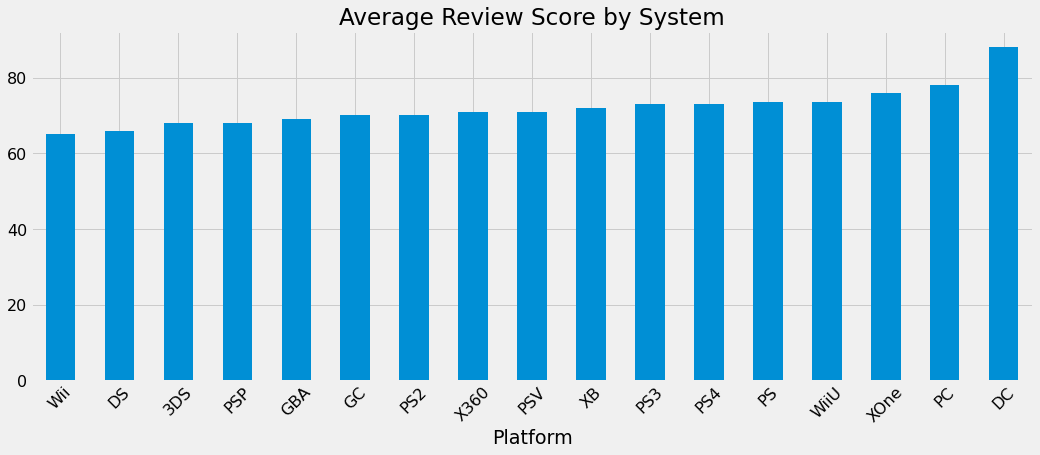

In [4]:
df.groupby('Platform')['Critic_Score'].median().sort_values().plot(kind='bar', figsize=(16,6),
                                                  rot=45, title='Average Review Score by System');

**Alright** looks like we have some kind of correlation

in some of these cases this difference is probably not statistically significant, because a few of these systems are only representing a few games total

### Brief time-series tangent

Curious to see the review scores over time

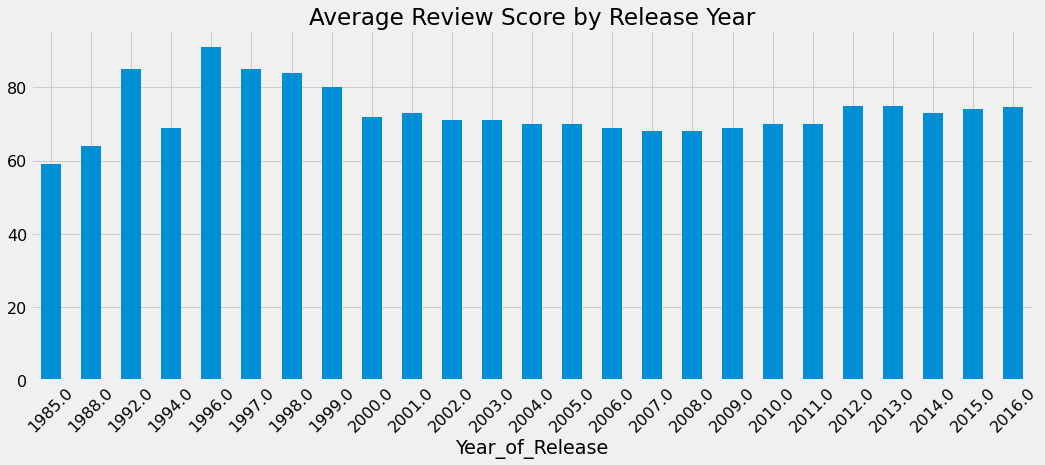

In [5]:
df.groupby('Year_of_Release')['Critic_Score'].median().plot(kind='bar', figsize=(16,6),
                                                  rot=45, title='Average Review Score by Release Year');

In [6]:
df[df.Year_of_Release == 1996]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
153,Tekken 2,PS,1996.0,Fighting,Sony Computer Entertainment,2.26,1.89,1.36,0.23,5.74,89.0,8.0,8.9,102.0,Namco,T
203,Resident Evil,PS,1996.0,Action,Virgin Interactive,2.05,1.16,1.11,0.73,5.05,91.0,8.0,9,266.0,Capcom,M
229,Tomb Raider,PS,1996.0,Action,Eidos Interactive,2.29,1.97,0.13,0.24,4.63,91.0,13.0,8.6,147.0,Core Design Ltd.,T
903,PaRappa The Rapper,PS,1996.0,Misc,Sony Computer Entertainment,0.26,0.16,1.46,0.03,1.92,92.0,15.0,7.4,48.0,NanaOn-Sha,K-A
1160,Diablo,PC,1996.0,Role-Playing,Activision,0.01,1.58,0.00,0.00,1.59,94.0,12.0,8.7,850.0,Blizzard Entertainment,M
2014,Tomb Raider,PC,1996.0,Action,Eidos Interactive,0.96,0.07,0.00,0.00,1.03,86.0,18.0,8.5,3552.0,"Crystal Dynamics, Nixxes Software",M
6632,WipEout XL,PS,1996.0,Racing,Psygnosis,0.14,0.10,0.00,0.02,0.25,93.0,8.0,8.7,20.0,Psygnosis,NaN
9215,Super Puzzle Fighter II Turbo,PS,1996.0,Puzzle,Virgin Interactive,0.08,0.05,0.00,0.01,0.14,83.0,9.0,7.4,5.0,Capcom,E


In [7]:
df.Critic_Count.sum(), df.User_Count.sum()

(214498.0, 1216977.0)

In [8]:
df.Rating.value_counts()

E       2808
T       2640
M       1483
E10+    1118
RP         3
AO         1
K-A        1
Name: Rating, dtype: int64

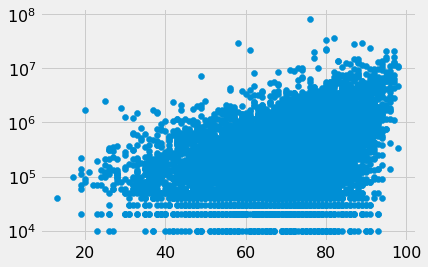

In [13]:
plt.scatter(df.Critic_Score, df.Global_Sales*1000000);
plt.yscale('log')

In [10]:
df.corr()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
Year_of_Release,1.000000,-0.002386,0.050745,-0.026317,0.053747,0.020093,0.011411,0.223407,0.196867
NA_Sales,-0.002386,1.000000,0.840590,0.468787,0.728123,0.955705,0.240755,0.295413,0.244492
EU_Sales,0.050745,0.840590,1.000000,0.520103,0.718046,0.938926,0.220752,0.277533,0.282624
JP_Sales,-0.026317,0.468787,0.520103,1.000000,0.396889,0.613566,0.152593,0.180219,0.072427
Other_Sales,0.053747,0.728123,0.718046,0.396889,1.000000,0.805510,0.198554,0.251639,0.239171
Global_Sales,0.020093,0.955705,0.938926,0.613566,0.805510,1.000000,0.245471,0.303571,0.262935
Critic_Score,0.011411,0.240755,0.220752,0.152593,0.198554,0.245471,1.000000,0.425504,0.264376
Critic_Count,0.223407,0.295413,0.277533,0.180219,0.251639,0.303571,0.425504,1.000000,0.362334
User_Count,0.196867,0.244492,0.282624,0.072427,0.239171,0.262935,0.264376,0.362334,1.000000


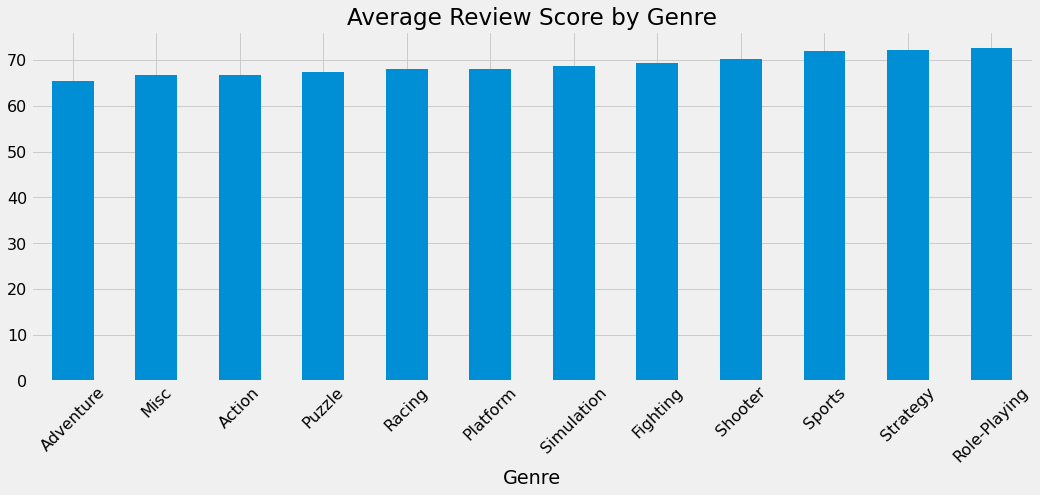

In [11]:
df.groupby('Genre')['Critic_Score'].mean().sort_values().plot(kind='bar', figsize=(16,6),
                                                  rot=45, title='Average Review Score by Genre');

In [48]:
df['score_bins'] = pd.cut(df.Critic_Score,[0,20,30,40,50,60,70,80,90,100])
df.Global_Sales *= 1000000
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,score_bins
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82530000.0,76.0,51.0,8,322.0,Nintendo,E,"(70, 80]"
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35520000.0,82.0,73.0,8.3,709.0,Nintendo,E,"(80, 90]"
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32770000.0,80.0,73.0,8,192.0,Nintendo,E,"(70, 80]"
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29800000.0,89.0,65.0,8.5,431.0,Nintendo,E,"(80, 90]"
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28920000.0,58.0,41.0,6.6,129.0,Nintendo,E,"(50, 60]"


In [64]:
sbb = df.groupby('score_bins')['Global_Sales'].median()
sbb

score_bins
(0, 20]        90000.0
(20, 30]      110000.0
(30, 40]      100000.0
(40, 50]      130000.0
(50, 60]      160000.0
(60, 70]      190000.0
(70, 80]      300000.0
(80, 90]      620000.0
(90, 100]    1720000.0
Name: Global_Sales, dtype: float64

Text(0.5, 1.0, 'Median Sales by Metacritic Score Group')

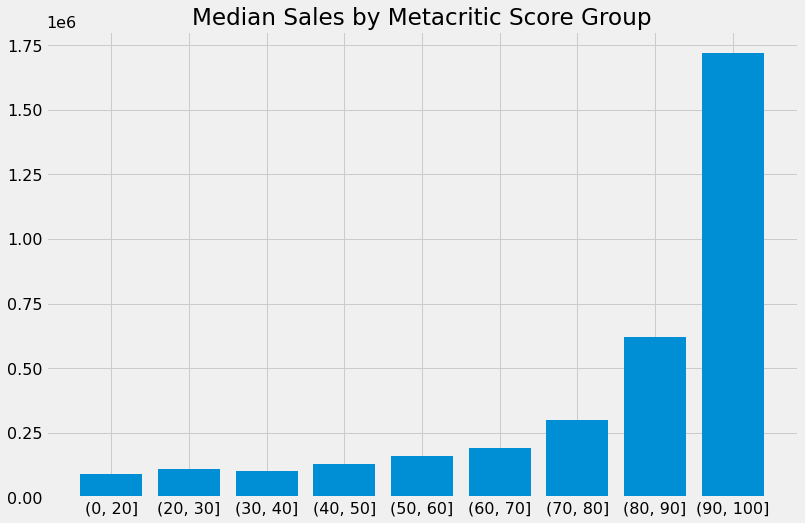

In [72]:
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(sbb.index.astype(str), sbb.values)
# ax.set_xticks(['<20', '20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s'])
ax.set_title('Median Sales by Metacritic Score Group')
#plt.ylim(5e4,5e6)

If you earn above a 90 on Metacritic, you are basically guaranteed some level of sales

If you don't earn above a 60 on metacritic, your maximum possible sales will be severly limited